# Processamento de Áudio
## Aula 15

* Sinais de áudio são, por natureza, analógicos;
* Para representarmos de forma digital, é necessário **amostrar** o sinal.

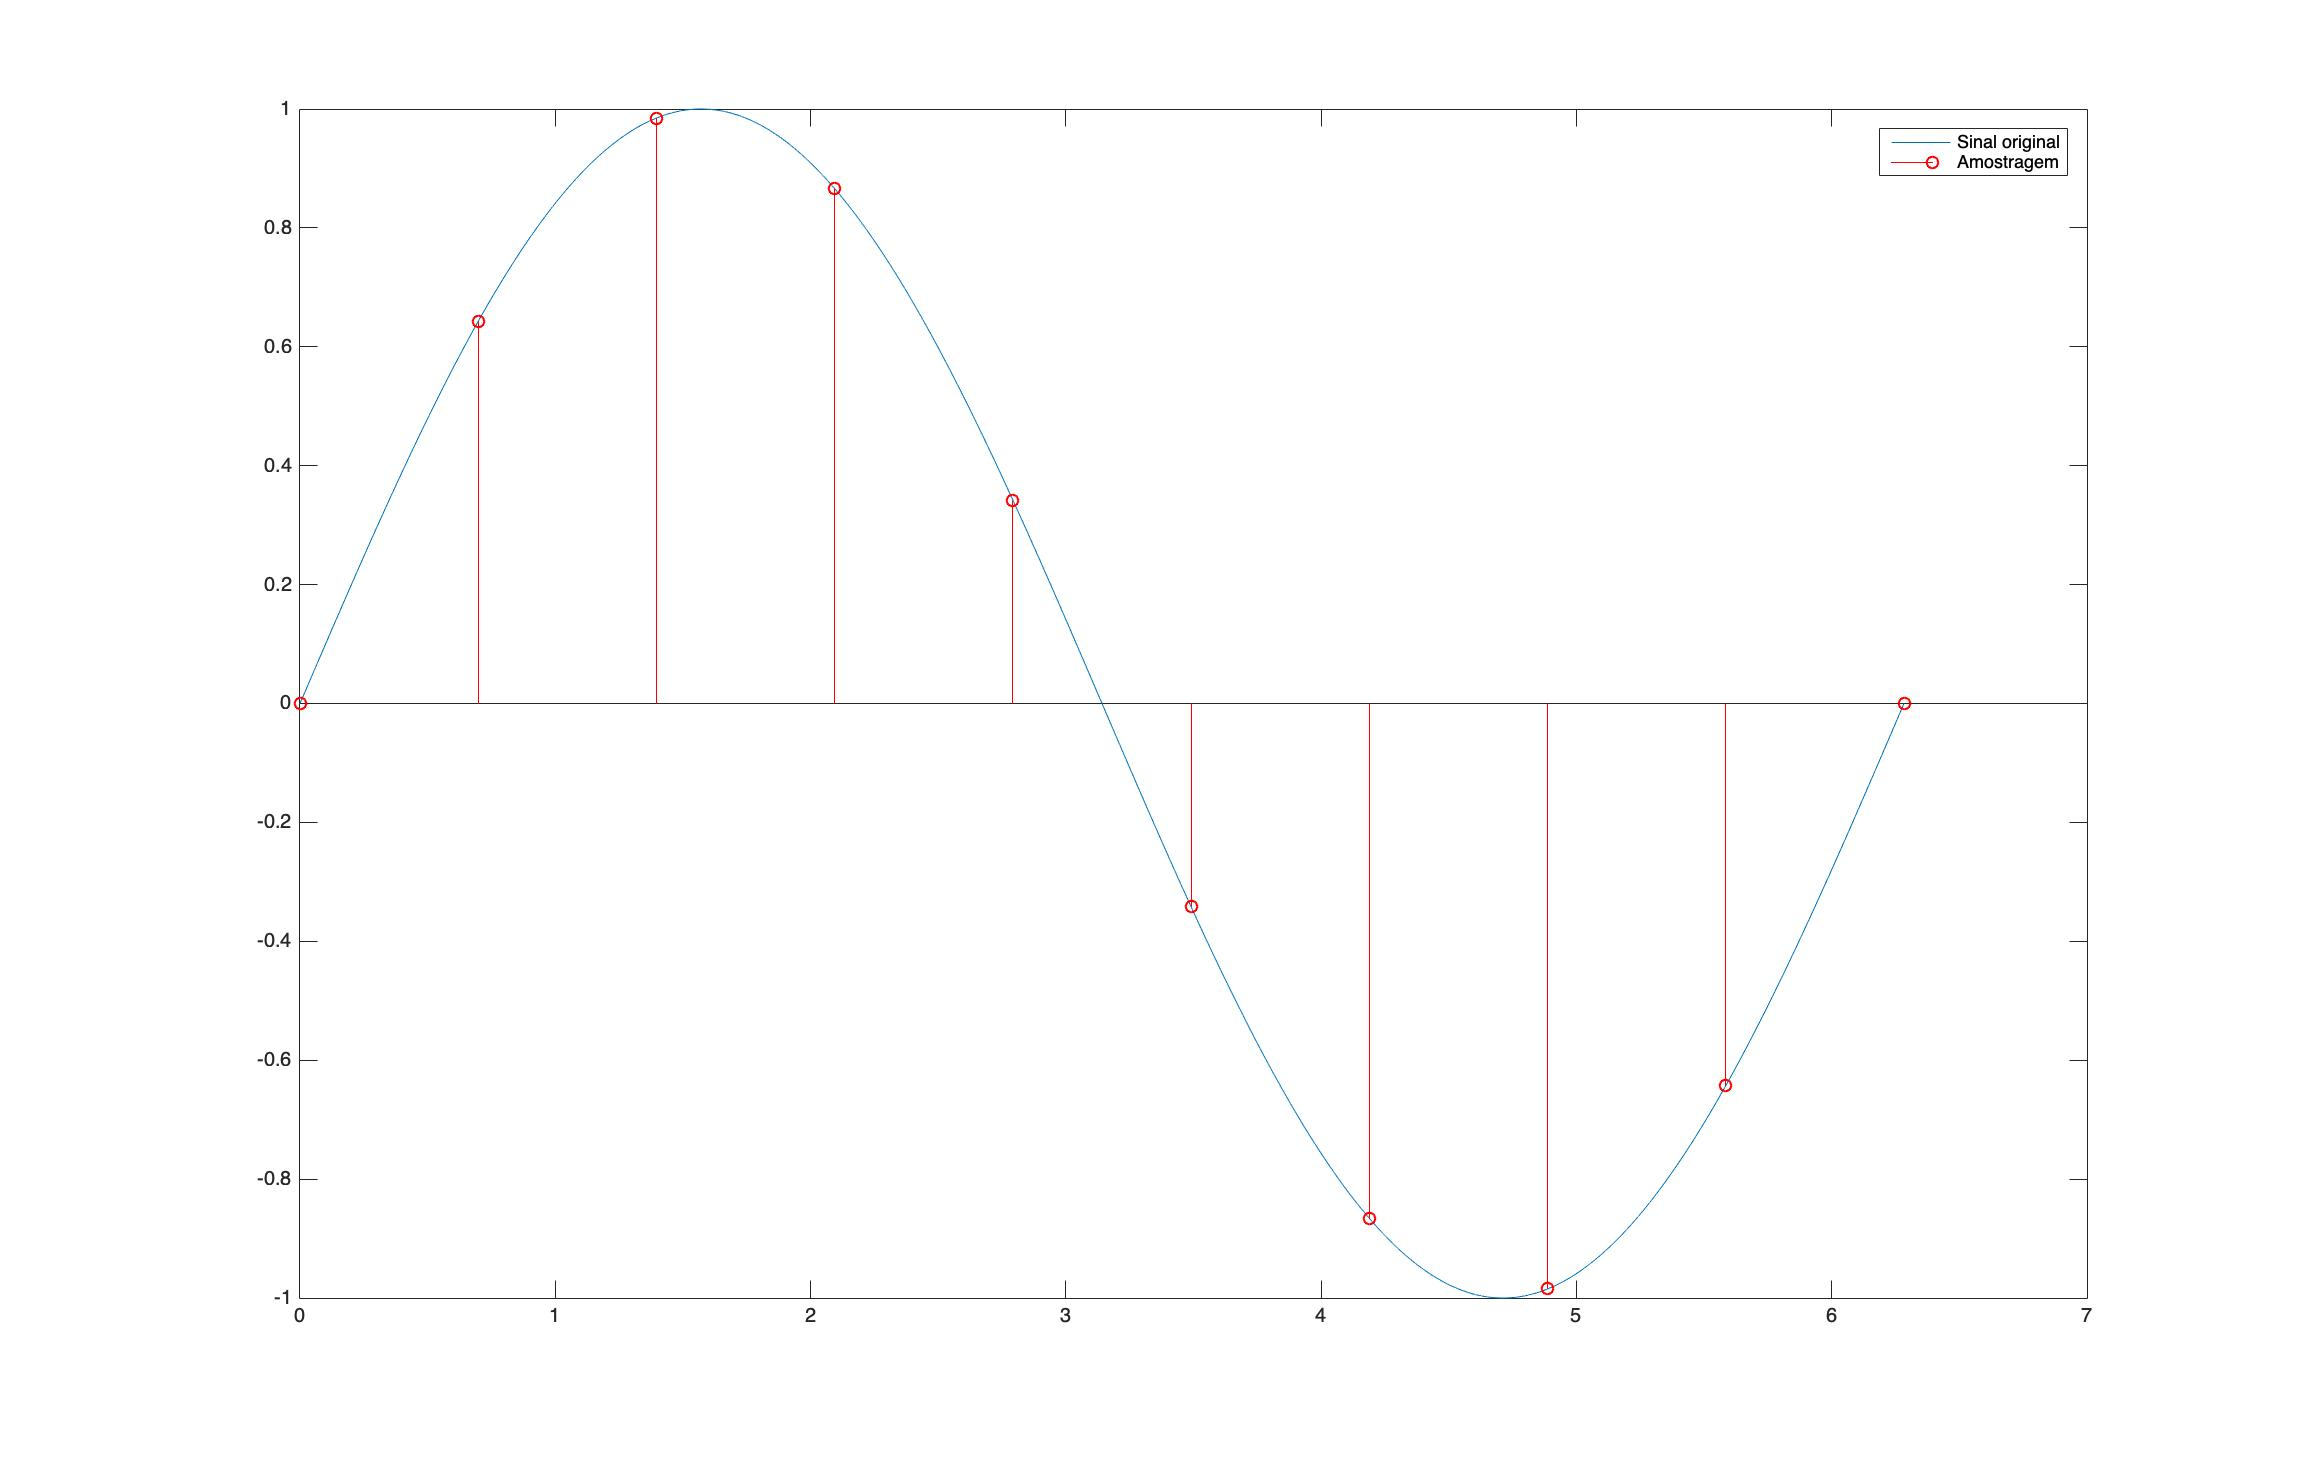

* O gráfico azul representa a onda original;
* Os pontos em vermelho são os pontos de amostragem.

* De acordo com o [Teorema de Nyquist-Shannon](https://pt.wikipedia.org/wiki/Teorema_da_amostragem_de_Nyquist%E2%80%93Shannon), um sinal deve ser amostrado a uma frequência pelo menos **duas vezes maior** que a frequência máxima a ser reproduzida;
* Como a audição humana escuta ondas entre 20Hz e 20kHz, uma frequência comum é 44,1kHz, que atende o teorema de Nyquist-Shannon.

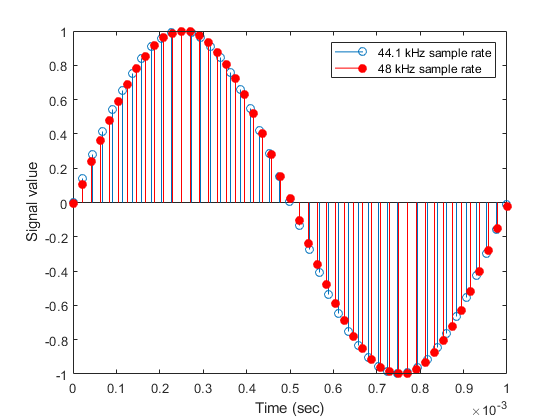

### Terminologia

* **Altura**: Classifica o som como grave ou agudo;
* **Áudio**: Faixa de frequências de onda que podem ser escutadas por humanos;
* [Canal](https://www.youtube.com/watch?v=4bJ0dvAl98k): Representação de áudio vindo ou indo até um certo ponto;
    * Para arquivos *stereo* (maioria), haverá 2 canais;
* **Intensidade**: Volume do som;
* **Profundidade de bits (bit depth)**: Quantos bits são usados para representar uma amplitude;
    * Assim como imagens, pode ser 8-, 16-, 24- ou 32-bits.
* **Taxa de amostragem (sample rate)**: Amostras por segundo;
    * 44,1kHz é o recomendado;
* **Taxa de bits (bit rate)**: Quantos bits são transmitidos por segundo;
    * Em outras palavras, a "qualidade" do som;
    * Um valor comum para som de boa qualidade é entre 64kbps e 192kbps (96kbps+ recomendado).

### Cálculo da taxa de bits

$$b_r = b_d \cdot f_s \cdot n_c$$

Na qual:
* $b_r$: Taxa de bits;
* $b_d$: Profundidade de bits;
* $f_s$: Taxa de amostragem;
* $n_c$: Número de canais.

## Áudio digital com Python

* Utilizaremos o `wavfile` da biblioteca `scipy` para lermos e escrevermos áudios:

In [10]:
!python -m pip install scipy

                                              0.0/42.2 MB ? eta -:--:--
                                              0.0/42.2 MB ? eta -:--:--
                                              0.2/42.2 MB 2.1 MB/s eta 0:00:21
                                              0.3/42.2 MB 2.6 MB/s eta 0:00:16
                                              0.6/42.2 MB 3.2 MB/s eta 0:00:14
                                              0.8/42.2 MB 3.5 MB/s eta 0:00:12
                                              1.0/42.2 MB 3.6 MB/s eta 0:00:12
     -                                        1.2/42.2 MB 4.0 MB/s eta 0:00:11
     -                                        1.4/42.2 MB 3.9 MB/s eta 0:00:11
     -                                        1.6/42.2 MB 3.8 MB/s eta 0:00:11
     -                                        1.6/42.2 MB 3.8 MB/s eta 0:00:11
     -                                        1.8/42.2 MB 3.5 MB/s eta 0:00:12
     -                                        1.9/42.2 MB 3.5 MB/s

In [20]:
from scipy.io import wavfile

ModuleNotFoundError: No module named 'scipy'

* Para reproduzir áudio no Jupyter, utilizaremos a biblioteca `sounddevice`, que pode ser instalada com `pip install sounddevice` no prompt de comando:

In [15]:
!pip install sounddevice

In [17]:
import sounddevice as sd

ModuleNotFoundError: No module named 'sounddevice'

* Por fim, utilizaremos o `numpy` para manipular arrays e `matplotlib` para exibir gráficos:

In [5]:
import matplotlib.pyplot as plt
import numpy as np

* Para carregar um áudio no formato `.wav`, utilizaremos o `wavfile.read`:

In [6]:
# fs: Taxa de amostragem;
# data: Canais de som;
fs, data = wavfile.read("DITTY1.WAV")

NameError: name 'wavfile' is not defined

* Para tocar um áudio, usaremos a seguinte linha de código:

In [7]:
sd.play(data, fs)

NameError: name 'sd' is not defined

* Para parar um áudio, usaremos a seguinte linha de código:

In [25]:
sd.stop()

In [26]:
print("Canais:", data.shape)
print("Número de amostras:", data.shape[0])
print("Profundidade de bits:", data.dtype)
print("Taxa de Amostragem:", fs)
print("Taxa de bits:", 8 * fs * 1)

Canais: (2646000, 2)
Número de amostras: 2646000
Profundidade de bits: int16
Taxa de Amostragem: 44100
Taxa de bits: 352800


In [14]:
fs, data = wavfile.read("Roundabout.wav")
sd.play(data, fs)

In [15]:
sd.stop()

In [11]:
print("Canais:", data.shape[1])
print("Número de amostras:", data.shape[0])
print("Profundidade de bits:", data.dtype)
print("Taxa de Amostragem:", fs)
print("Taxa de bits:", 16* fs * 2)

Canais: 2
Número de amostras: 2646000
Profundidade de bits: int16
Taxa de Amostragem: 44100
Taxa de bits: 1411200


## Representação de áudio

* Geralmente, é representado como uma matriz MxN, na qual M é o número de amostras e N é o número de canais;
* Uma forma muito simples de representar um áudio é a partir de uma senoide:
$$s(x)=\sin(2\cdot\pi\cdot f\cdot x)$$

In [29]:
# O código gera uma senóide com taxa de amostragem 10000 Hz,
# frequência de 440 Hz (A4 em notação musical),
# durando 2 segundos.

fs = 10000
f = 440
t = 2

audio = np.zeros(shape = (fs * t, 1), dtype = np.float32)

for i in range(fs * t):
    audio[i, 0] = np.sin(2 * np.pi * f * i / fs)

sd.play(audio, fs)

In [30]:
# O código gera uma senóide com taxa de amostragem 10000 Hz,
# frequência de 349.228 Hz no canal 0 (F4 em notação musical),
# frequência de 440 Hz no canal 1 (A4 em notação musical),
# durando 2 segundos.

fs = 10000
f1 = 349.228
f2 = 440
t = 2

audio = np.zeros(shape = (fs * t, 2), dtype = np.float32)

for i in range(fs * t):
    audio[i, 0] = np.sin(2 * np.pi * f1 * i / fs)
    audio[i, 1] = np.sin(2 * np.pi * f2 * i / fs)

sd.play(audio, fs)

## Manipulação de áudio

* Visto que `data` é uma matriz onde cada linha representa uma amostra para cada canal, e `fs` é a frequência de amostragem, ou o número de amostras por segundo, pode-se concluir que, em 1 segundo de áudio, há `fs` linhas na matriz `data`;
* Se, por exemplo, deseja-se executar um áudio a partir do segundo 40, pode-se fazer:

In [31]:
fs, data = wavfile.read("Roundabout.wav")

sd.play(data[fs * 40:, :], fs)

In [32]:
sd.stop()

* A **amplitude** é o principal responsável pelo volume do som que ouvimos (embora tons agudos, de frequências mais altas, são percebidos como mais altos pelo ouvido, mesmo que estejam com a mesma amplitude);
* Iremos converter o áudio para o formato `float32`, de forma a não ocorrer underflow e overflow, e normalizar para valores entre `-1` e `1` (valor máximo de um `int16` é `32767`;
* Para mudar o volume do áudio, basta multiplicar pontualmente a matriz `data` por um escalar, por exemplo:

In [33]:
parte = data[fs * 40:fs * 45, :].astype(np.float32) / 32767

In [35]:
sd.play(0.1 * parte, fs)

* Pode-se também variar a **frequência do áudio** (**altura**), deixando-o mais agudo ou mais grave:

In [40]:
sd.play(parte, fs * 2)

In [38]:
sd.stop()

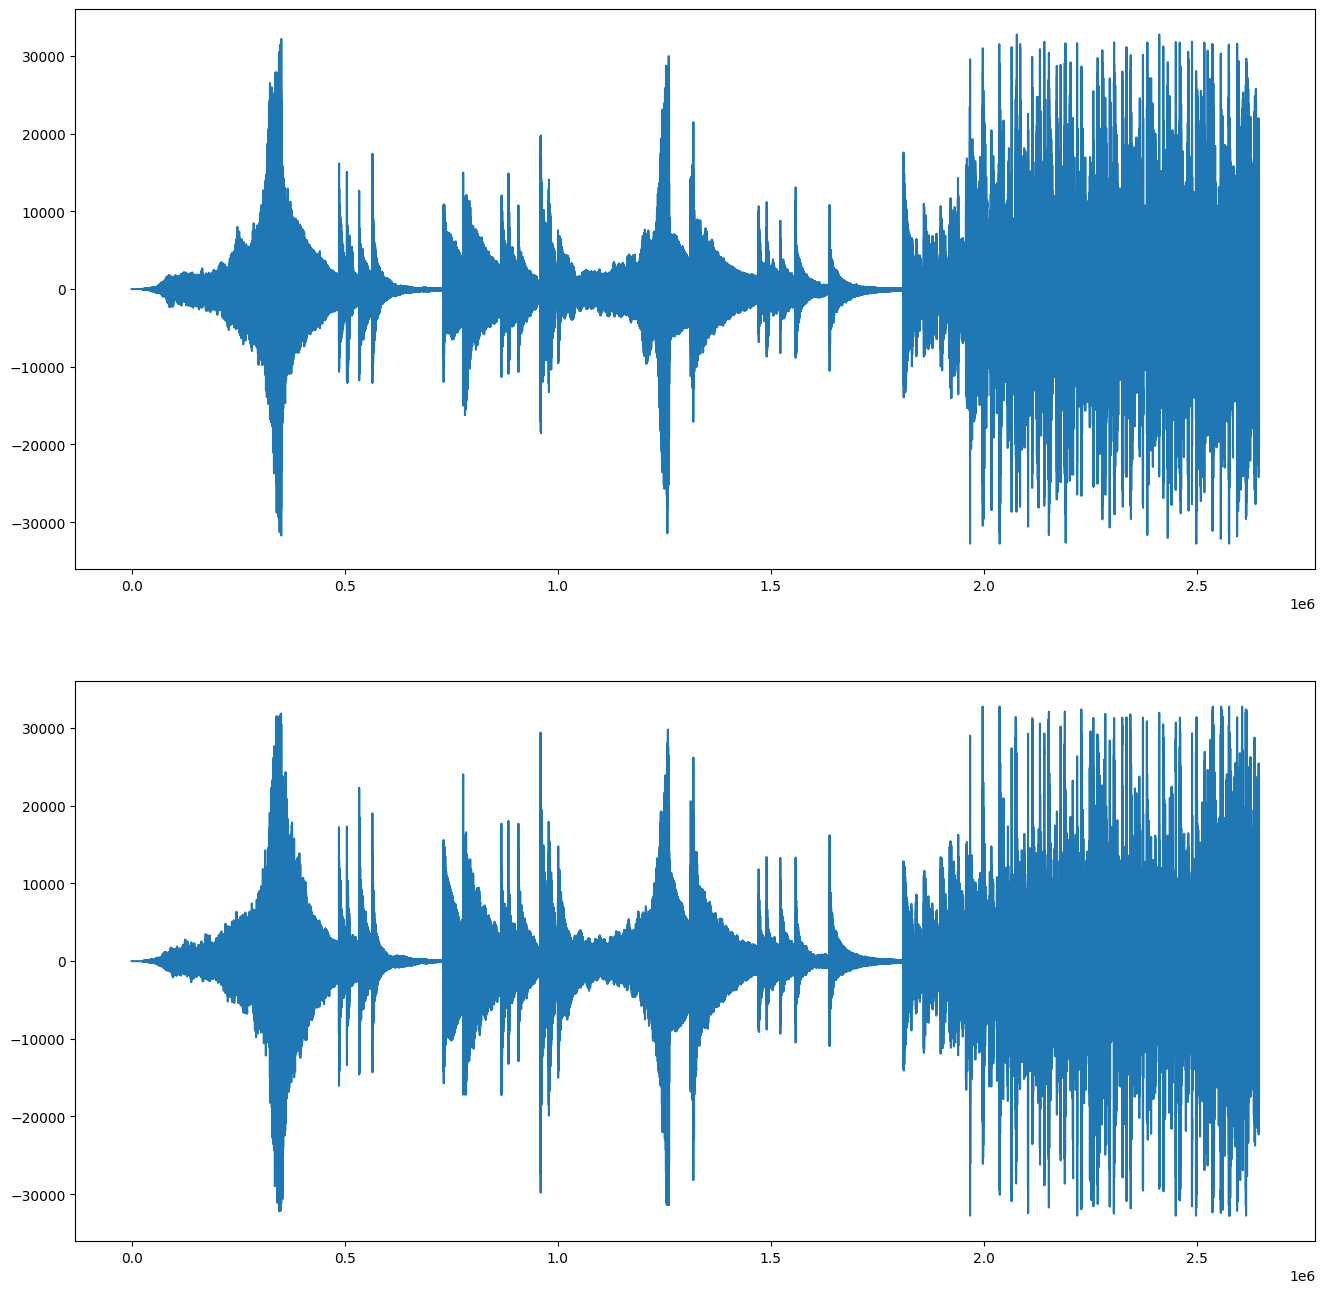

In [41]:
plt.figure(figsize = (16,16))
plt.subplot(2, 1, 1)
plt.plot(data[:, 0])
plt.subplot(2, 1, 2)
plt.plot(data[:, 1])

## wavfile.write

* Podemos salvar um áudio no formato WAVE da seguinte forma:

In [20]:
wavfile.write("audio.wav", fs, parte)

# Exercícios

1. A partir de um tempo inicial t escolhido por você, diminua o volume de um áudio em 10% (fixos) por segundo.
    * O decrescimento deve parar quando o volume atingir 0%, e em seguida o trecho de áudio que sofreu a diminuição deve ser:
    * Salvo com taxa de amostragem inalterada;
    * Tocado, 50% mais grave com relação à taxa de amostragem original nos primeiros 5 segundos e 50% mais agudo com relação à taxa de amostragem original nos segundos restantes;


* t + 0 até t + 1: volume = 90% nesse trecho de 1 segundo;
* t + 1 até t + 2: volume = 80% nesse trecho de 1 segundo;
* t + 2 até t + 3: volume = 70% nesse trecho de 1 segundo;
* t + 3 até t + 4: volume = 60% nesse trecho de 1 segundo;
* E assim por diante...
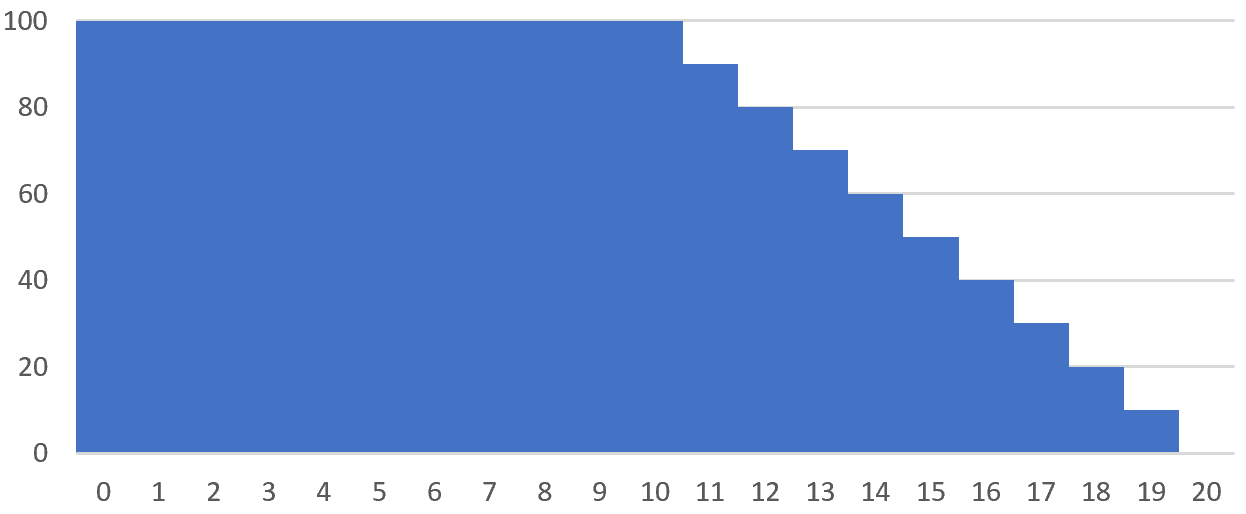
Com t = 10.

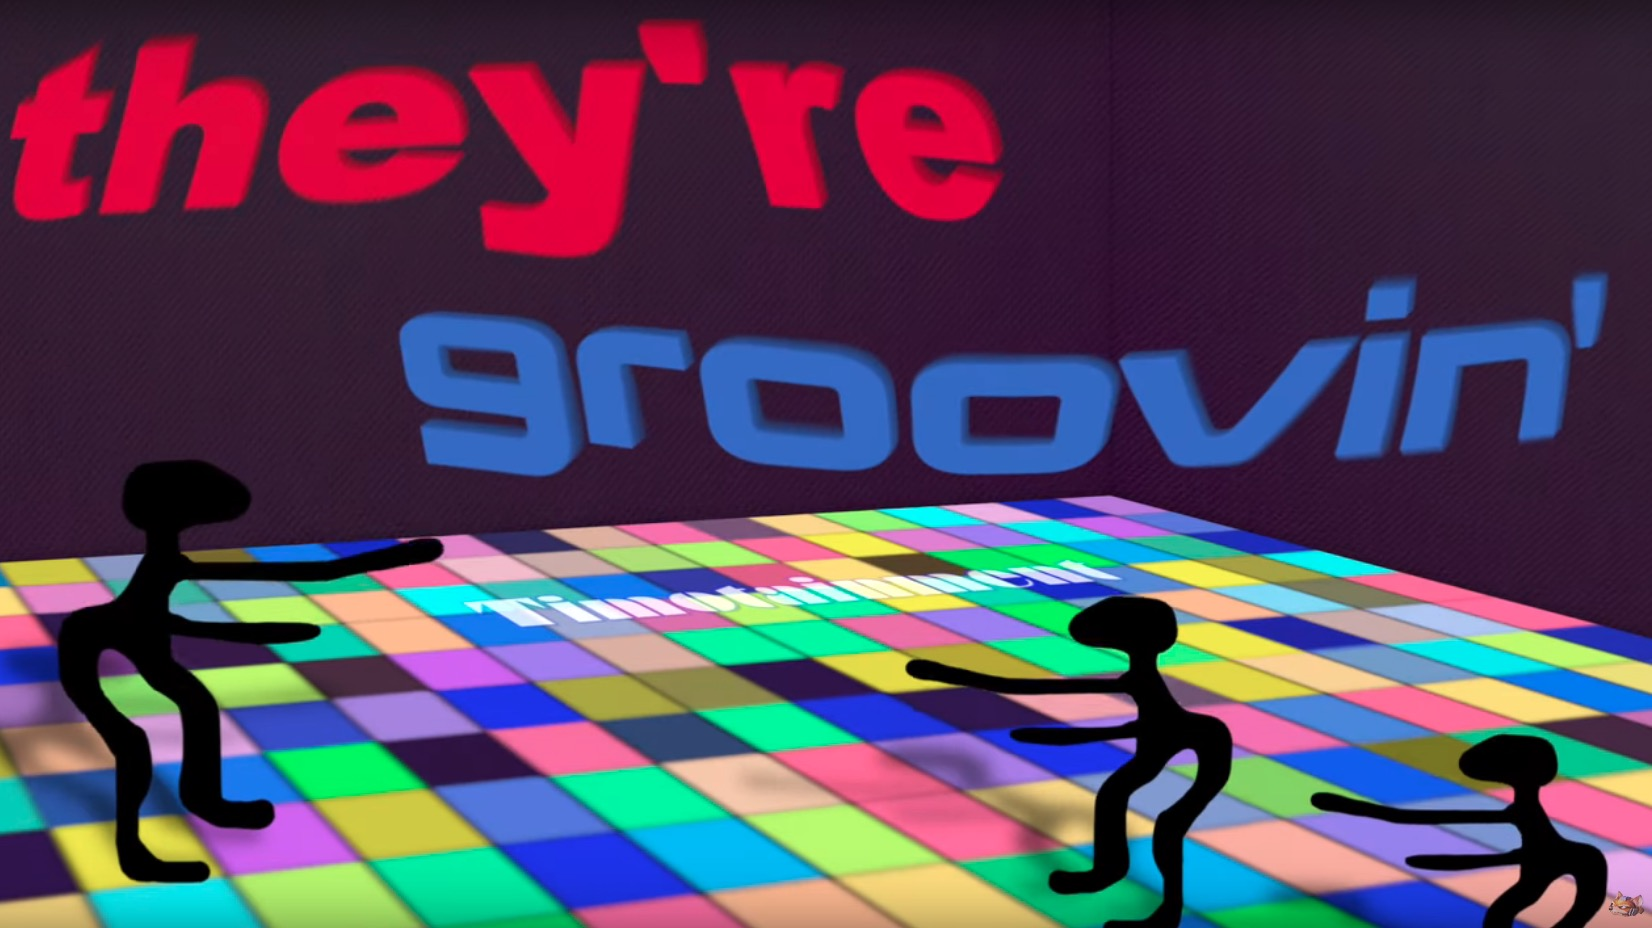

# Referências
* https://micropyramid.com/blog/understanding-audio-quality-bit-rate-sample-rate/
* https://www.pythonforengineers.com/audio-and-digital-signal-processingdsp-in-python/

Aula remota, conforme Port. 345/2020 – MEC